In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [11]:
df.isna().sum()/len(df)*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

<Axes: >

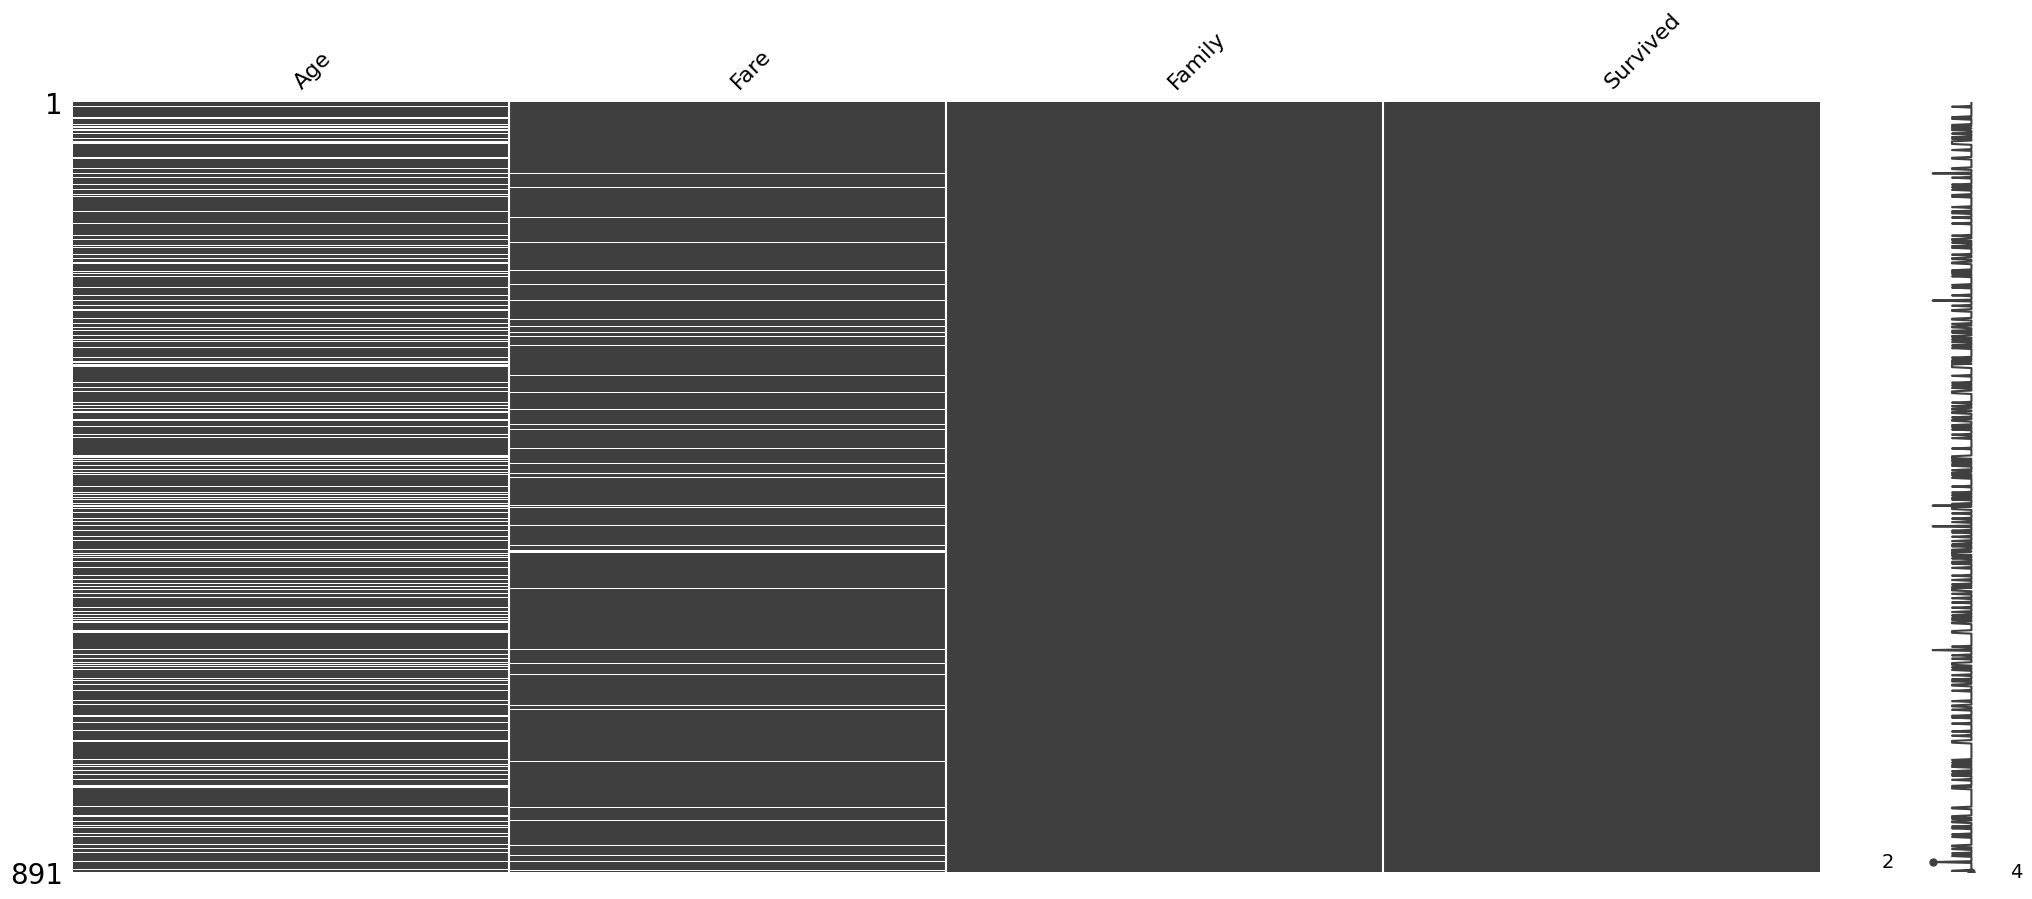

In [20]:
msno.matrix(
                df = df
)

<Axes: >

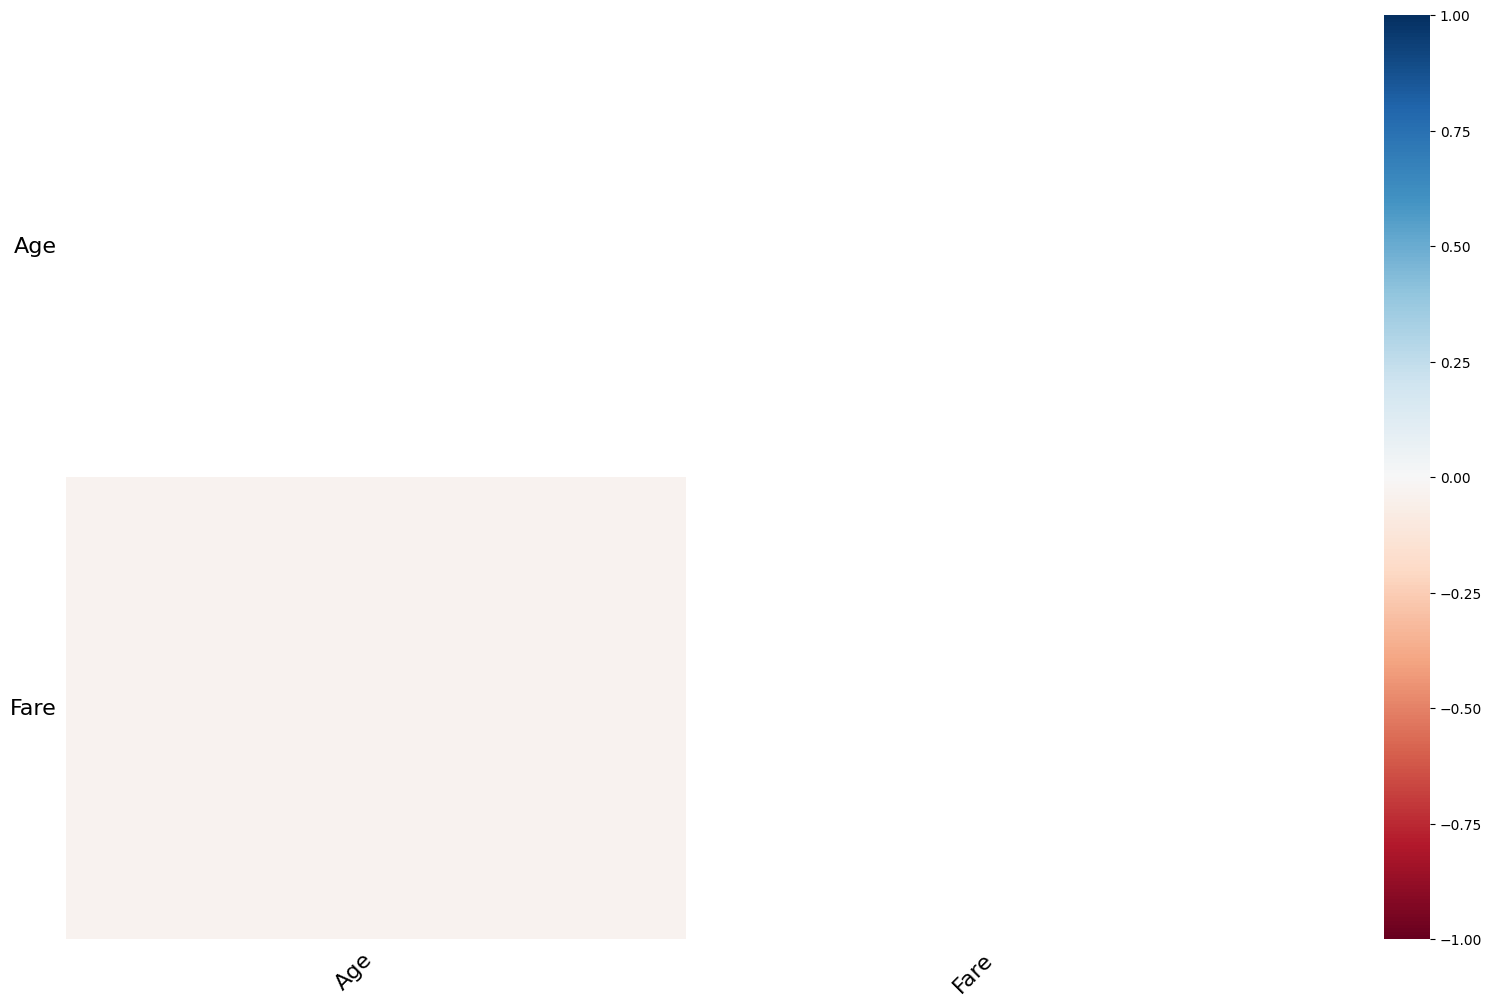

In [19]:
msno.heatmap(
                df = df
)

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [22]:
itr = IterativeImputer(
    max_iter = 10,
    random_state = 42
)

In [23]:
df_imputed = itr.fit_transform(df)

In [29]:
df_imputed = pd.DataFrame(
                            df_imputed , 
                            columns = itr.get_feature_names_out()
)

In [30]:
df_imputed

,Age,Fare,Family,Survived
0,22.000000,7.25000,1.0,0.0
1,38.000000,71.28330,1.0,1.0
2,26.000000,7.92500,0.0,1.0
3,35.000000,53.10000,1.0,1.0
4,35.000000,8.05000,0.0,0.0
...,...,...,...,...
886,27.000000,13.00000,0.0,0.0
887,19.000000,30.00000,0.0,1.0
888,23.626379,23.45000,3.0,0.0
889,26.000000,38.57736,0.0,1.0


In [32]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Family    891 non-null    float64
 3   Survived  891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


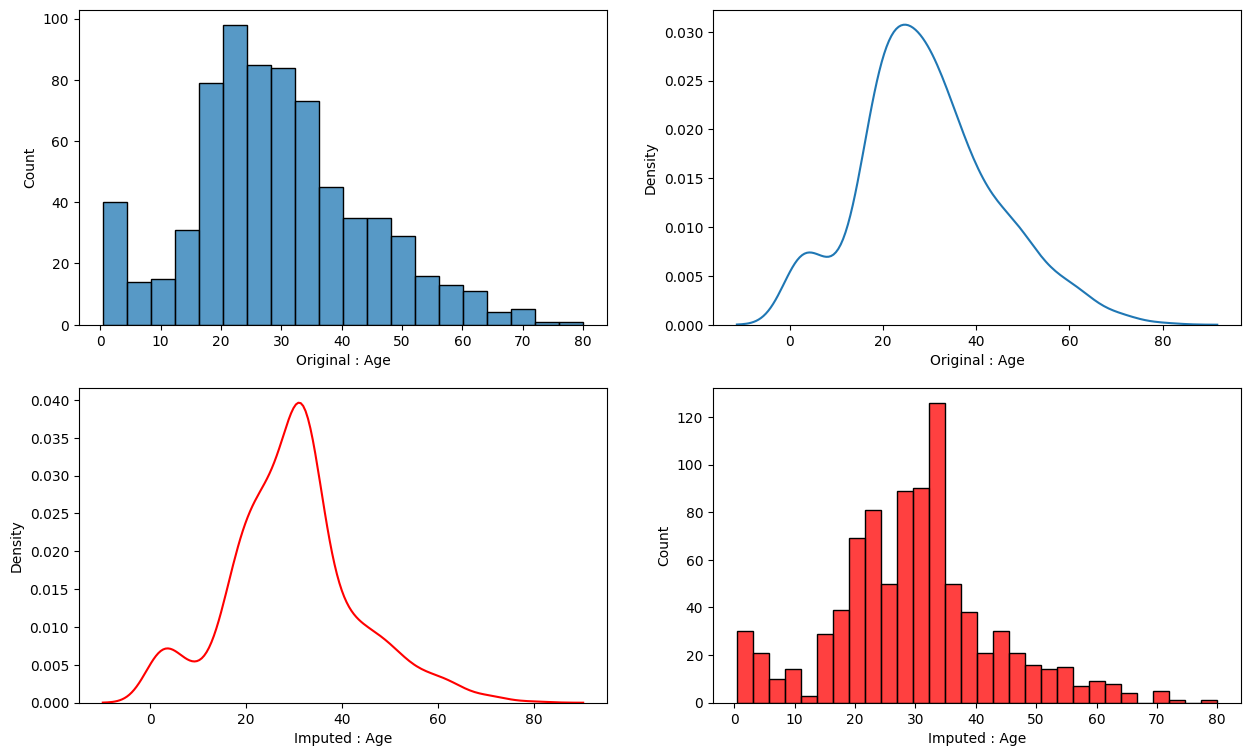

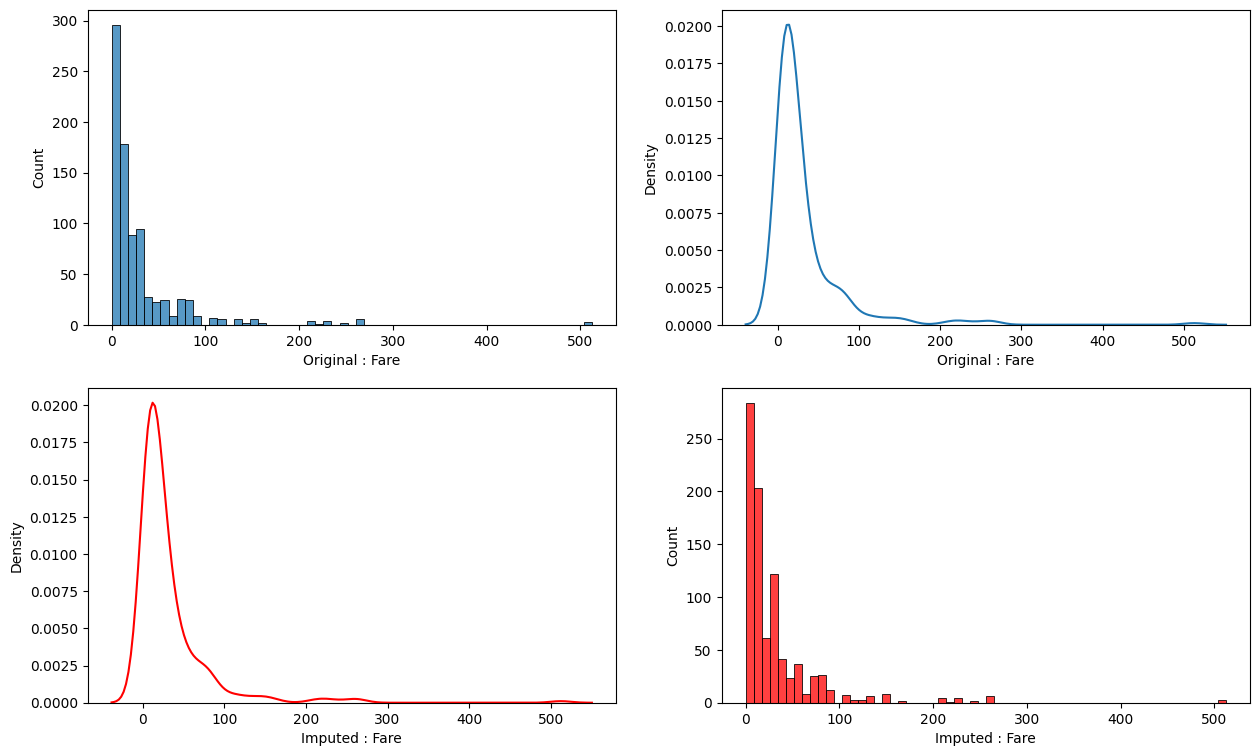

In [51]:
for x in ['Age' , 'Fare']:

    plt.figure(figsize=(15,9))

    plt.subplot(221)
    sns.histplot(
                    data = df,
                    x = x
    )
    plt.xlabel(f'Original : {x}')

    plt.subplot(222)
    sns.kdeplot(
                    data = df,
                    x = x
    )
    plt.xlabel(f'Original : {x}')

    plt.subplot(223)
    sns.kdeplot(
                    data = df_imputed,
                    x = x,
                    color = 'red'
    )
    plt.xlabel(f'Imputed : {x}')

    plt.subplot(224)
    sns.histplot(
                    data = df_imputed,
                    x = x,
                    color = 'red'
    )
    plt.xlabel(f'Imputed : {x}')

    plt.show()

In [ ]:
# Alternatively : 

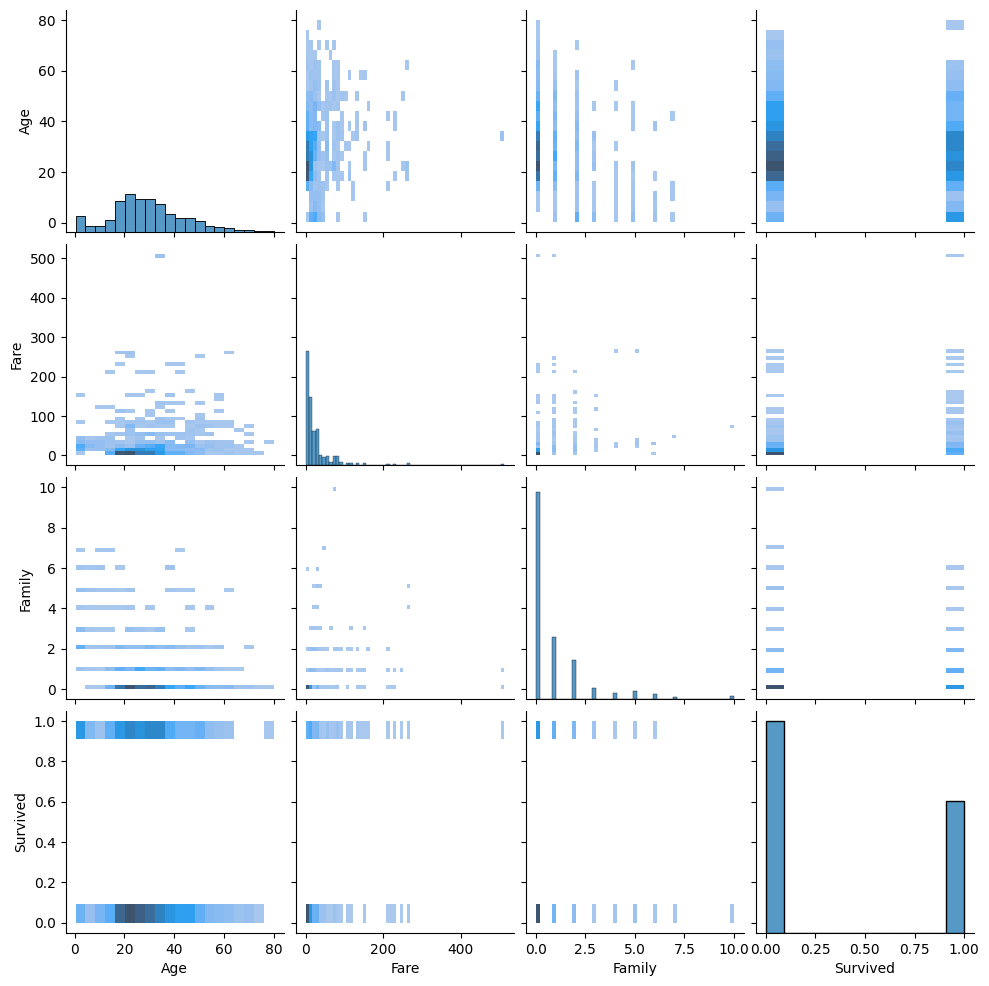

In [38]:
sns.pairplot(
                data = df,
                kind = 'hist'
)


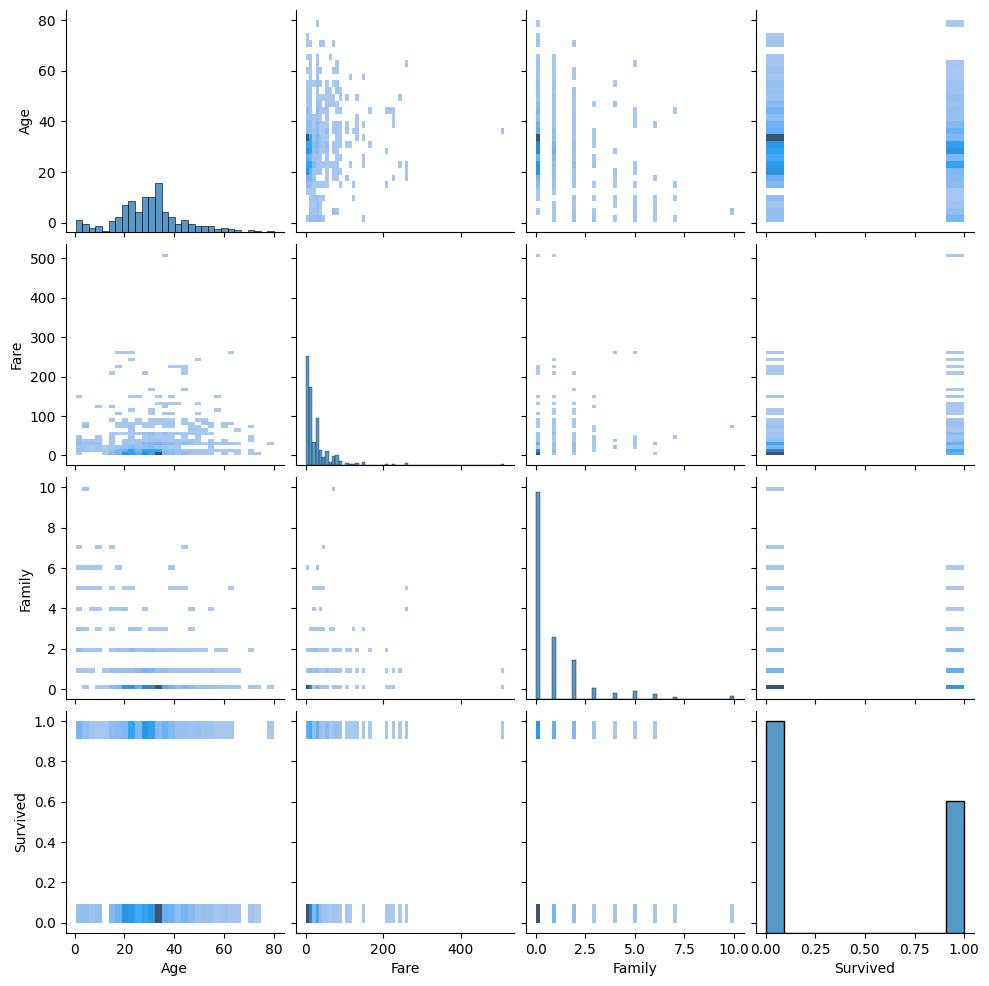

In [54]:
sns.pairplot(
                data = df_imputed,
                kind = 'hist'
)

In [55]:
# We will use ther survived class for prediction

In [59]:
X = df_imputed.drop('Survived', axis = 1)
y = df_imputed['Survived']

In [61]:
X_train , X_test , y_train , y_test = train_test_split(
                                                        X ,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 42
)

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipe1 = Pipeline([
                    ()
])